In [ ]:
'''Plot results of loop'''
def plotSconvergence(p, delta, show):
    Sratio = np.zeros((w,w))
    y10=[]
    y20=[]
    y21=[]
    y30=[]
    y31=[]
    y32=[]
    z10=0
    z20=0
    z21=0
    z30=0
    z31=0
    z32=0
    for x in range(0, p):        
        Fgonly=findonlyF(Xg, bebug=False, show=False)
        Sg=FullSum(Xg, Fg, Energies, et, ep, Q, alpha, debug=False, show=False)
        Sdiff=Sg-S
        for i in range(0,len(ep[0])):
            for j in range(0,len(ep[0])):
                if np.not_equal(S[i,j],0)==True:
                    Sratio[i,j]=Sdiff[i,j]/S[i,j]
        z10=Sratio[1,0]
        z20=Sratio[2,0]
        z21=Sratio[2,1]
        z30=Sratio[3,0]
        z31=Sratio[3,1]
        z32=Sratio[3,2]
        y10.append(z10)
        y20.append(z20)
        y21.append(z21)
        y30.append(z30)
        y31.append(z31)
        y32.append(z32)
#         if np.equal(Sdiff.all(),0)==False:
#             print("Done!")
        for i in range(0,len(Xg[0])):
            for j in range(0,len(Xg[0])):
                if Sdiff[i,j]>delta:
                    Xg[i,j]=Xg[i,j]-Xg[i,j]*.01
                if Sdiff[i,j]<(-delta):
                    Xg[i,j]=Xg[i,j]+Xg[i,j]*.01
        
    if show==True:
        print("Final Guess", '\n', Sg)
        print("Goal" '\n', S)
        print("New Ratio", '\n', Sratio)
        print('Branching Fractions', '\n', Xg)
        
    return np.array(y10), np.array(y20), np.array(y21), np.array(y30), np.array(y31), np.array(y32)


Y10, Y20, Y21, Y30, Y31, Y32 = plotSconvergence(10000, 0.001, show=True)

plt.plot(Y10, 'violet')
plt.plot(Y20, 'b:')
plt.plot(Y21, 'g--')
plt.plot(Y30, 'r')
plt.plot(Y31, 'orange')
plt.plot(Y32, 'yellow')

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
# plt.plot

# MS = np.amax(SR0)
# plt.figure(figsize=(10, 6), dpi=80)
# plt.imshow(SR0, cmap='seismic', vmin=-MS, vmax=MS, interpolation='none')
# plt.imshow(SR1, cmap='seismic', vmin=-MS, vmax=MS, interpolation='none')
# plt.colorbar()

In [ ]:
'''Sorry attempt to plot each element.'''
# '''Plot results of loop'''
# def plotSconvergence(p, delta, show):
#     Sratio = np.zeros((w,w))
#     Y=[]
#     Z=[]
#     for x in range(0, p):        
#         Fgonly=findonlyF(Xg, bebug=False, show=False)
#         Sg=FullSum(Xg, Fg, Energies, et, ep, Q, alpha, debug=False, show=False)
#         Sdiff=Sg-S
#         for i in range(0,len(ep[0])):
#             for j in range(0,len(ep[0])):
#                 if np.not_equal(S[i,j],0)==True:
#                     Sratio[i,j]=Sdiff[i,j]/S[i,j]
#             Z=Sratio[i,j]
#             Y.append(Z)
#         for i in range(0,len(Xg[0])):
#             for j in range(0,len(Xg[0])):
#                 if (np.absolute(Sdiff[i,j])>delta):
#                     Xg[i,j]=Xg[i,j]-Xg[i,j]*Sratio[i,j]
        
#     if show==True:
#         print("Final Guess", '\n', Sg)
#         print("Goal" '\n', S)
#         print("New Ratio", '\n', Sratio)
        
#     return np.array(Y)


# object = plotSconvergence(150, 0.05, show=False)

# plt.plot(object, 'b:');

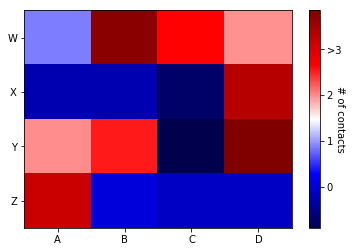

In [6]:
#discrete color scheme

#data
np.random.seed(42)
data = np.random.rand(4, 4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap='seismic')

#legend
cbar = plt.colorbar(heatmap)
cbar.ax.set_yticklabels(['0','1','2','>3'])
cbar.set_label('# of contacts', rotation=270)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

#lebels
column_labels = list('ABCD')
row_labels = list('WXYZ')
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

In [ ]:
'''Guess feeding fractions (Fg)'''
def findF(w, S, ep, bebug, show):
    Xg = np.zeros((w,w))
    for i in range(0,len(ep[0])):
        for j in range(0,len(ep[0])):
            if np.not_equal(S[i,j],0)==True:
                Xg[i,j]=S[i,j]/ep[i,j]
     
    Fg = np.zeros(w)
    for i in range(0,len(Xg[0])):
        for j in range(0,len(Xg[0])):
            fg = sum(Xg[i,0:len(Xg[0])])-sum(Xg[0:len(Xg[0]),i])
        Fg[i]=fg
        for d in range(0,len(Fg)):
            if Fg[d] < 0:
                Fg[d]=0
            
    if bebug==True:
        print("Peaks",'\n', S)
        print("peak efficiencies",'\n', ep)
        print("Branching ratio guess:",'\n', Xg)
        
    if show==True:
        print("Feeding ratio guess:",'\n', Fg)
    
    return(Fg)

# Attempt to sum out
#         for i in range(len(ep[0])):
#             if np.equal(j,0)==True: 
#                 if np.not_equal(j-2,0)==True:
#                     if np.not_equal(S[j,0],0)==True:
#                         Xguess[j,0]=(S[j,0]/ep[j,0])-np.multiply(S[j-1,0],S[j,1],S[j-2,0],S[j,2])/np.multiply(ep[j-1,0],ep[j,1],ep[j-2,0],ep[j,2])
#                 if np.not_equal(j-1,0)==True:
#                     if np.not_equal(S[j,0],0)==True:
#                         Xguess[j,0]=(S[j,0]/ep[j,0])-np.multiply(S[j-1,0],S[j,1])/np.multiply(ep[j-1,0],ep[j,1])
#                 elif np.not_equal(j-1,0)==False:
#                     if np.not_equal(S[j,0],0)==True:
#                         Xguess[j,0]=(S[j,0]/ep[j,0])
#             elif np.not_equal(j,0)==True:
#                 if np.not_equal(S[j,i],0)==True:
#                     Xguess[j,i]=S[j,i]/ep[j,i]